# Lead Scoring Case Study


#### With 37 predictor variables we need to predict whether a lead will be converted into paying customers or not.

### Step 1: Importing Data

In [1458]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [1459]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline


In [1460]:
# Importing dataset
Lead_data = pd.read_csv(r"C:\Users\rhitu\Documents\IIITBPGDS2022\Logistic Regression Assignment\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
Lead_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [1461]:
# Let's check the dimensions of the dataframe
Lead_data.shape

(9240, 37)

In [1462]:
# Let's see the statistical aspects of the dataframe
Lead_data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [1463]:
# Let's see the type of each column
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 2 : Data Preparation 

In [1464]:
# From the dataset, we observed many Select values which means the customer has selected no value from the list.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
Lead_data = Lead_data.replace('Select', np.nan)

In [1465]:
Lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [1466]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [1467]:
# We will drop the columns having more than 40% NA values

columns = Lead_data.columns

for i in columns:
    if((100*(Lead_data[i].isnull().sum()/len(Lead_data.index))) >= 40):
        Lead_data.drop(i, 1, inplace = True)

In [1468]:
Lead_data.shape

(9240, 30)

In [1469]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [1470]:
Lead_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [1471]:
# We can remove Tags data as it doesn't provide much information

Lead_data.drop("Tags",axis=1,inplace = True)

In [1472]:
Lead_data.shape

(9240, 29)

In [1473]:
Lead_data.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

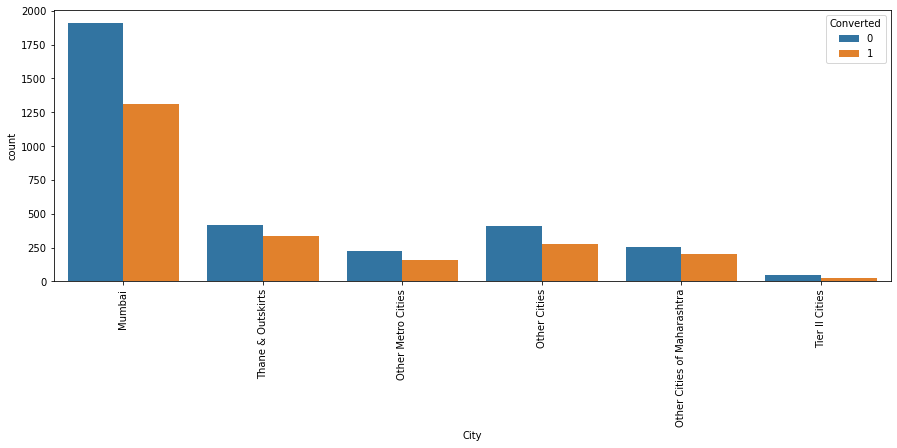

In [1474]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data['City'], hue=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1475]:
# replacing NaN values with Mode "Mumbai"
Lead_data['City'] = Lead_data['City'].replace(np.nan,'Mumbai')

In [1476]:
Lead_data["What matters most to you in choosing a course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1477]:
#replacing Nan values with Mode "Better Career Prospects"

Lead_data['What matters most to you in choosing a course'] = Lead_data['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [1478]:
len(Lead_data[Lead_data['What matters most to you in choosing a course'] == 'Better Career Prospects'])/Lead_data.shape[0]

0.9996753246753247

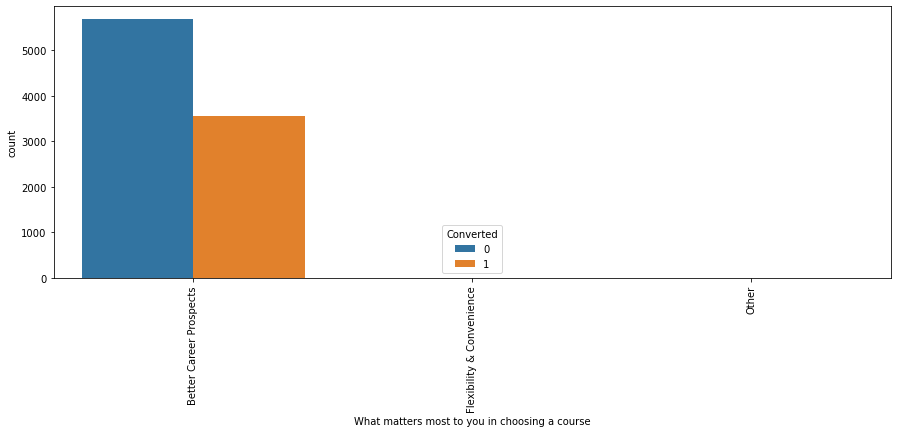

In [1479]:
plt.figure(figsize=(15,5))
s1=sns.countplot(Lead_data['What matters most to you in choosing a course'], hue=Lead_data.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1480]:
# This will be skewed towards Better career prospects as 99% of data is for Better career prospects so this is better removed from the dataset
Lead_data.drop("What matters most to you in choosing a course",axis=1,inplace = True)

In [1481]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                     26.63
Specialization                              36.58
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [1482]:
Lead_data.Country.value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [1483]:
# Replacing the NaN vlaues with mode 'India'
Lead_data['Country'] = Lead_data['Country'].replace(np.nan,'India')

In [1484]:
Lead_data.Country.value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [1485]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Country                                      0.00
Specialization                              36.58
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00


In [1486]:
len(Lead_data[Lead_data['Country'] == 'India'])/Lead_data.shape[0]

0.968939393939394

In [1487]:
# This will be skewed towards India as 97% of data is for India so this is better removed from the dataset
Lead_data.drop("Country",axis=1,inplace = True)

In [1488]:
Lead_data.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

<AxesSubplot:>

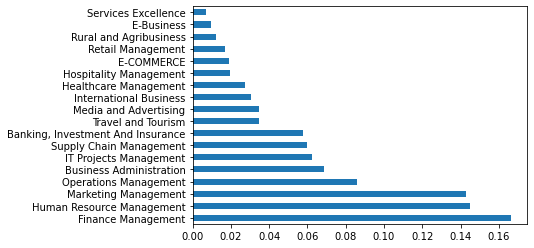

In [1489]:
Lead_data.Specialization.value_counts(normalize = True).plot.barh()

In [1490]:
Lead_data['Specialization'] = Lead_data['Specialization'].replace(np.nan,'Not Specified')

In [1491]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                  0.00
Lead Number                                  0.00
Lead Origin                                  0.00
Lead Source                                  0.39
Do Not Email                                 0.00
Do Not Call                                  0.00
Converted                                    0.00
TotalVisits                                  1.48
Total Time Spent on Website                  0.00
Page Views Per Visit                         1.48
Last Activity                                1.11
Specialization                               0.00
What is your current occupation             29.11
Search                                       0.00
Magazine                                     0.00
Newspaper Article                            0.00
X Education Forums                           0.00
Newspaper                                    0.00
Digital Advertisement                        0.00
Through Recommendations                      0.00


In [1492]:
Lead_data["What is your current occupation"].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1493]:
#replacing Nan values with Mode "Unemployed"

Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].replace(np.nan,'Unemployed')

In [1494]:
len(Lead_data[Lead_data['What is your current occupation'] == 'Unemployed'])/Lead_data.shape[0]

0.8971861471861472

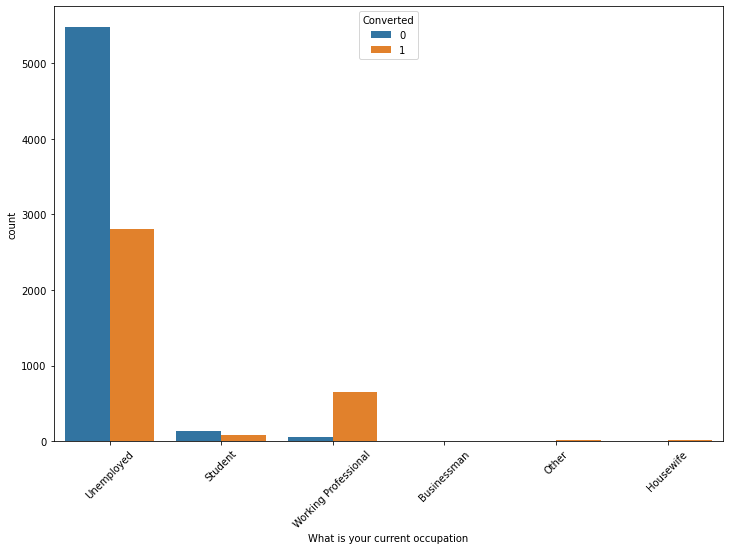

In [1495]:
plt.figure(figsize = (12,8))
sns.countplot(x='What is your current occupation',data=Lead_data,hue='Converted') 
plt.xticks(rotation=45)
plt.show()

In [1496]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [1497]:
# dropping all rows with less than 2% NaN values

Lead_data = Lead_data.dropna()

In [1498]:
round(100*(Lead_data.isnull().sum()/len(Lead_data.index)),2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [1499]:
Lead_data.drop("Prospect ID",axis=1,inplace = True)

In [1500]:
Lead_data.drop("Lead Number", axis =1, inplace = True)

In [1501]:
Lead_data.shape

(9074, 25)

In [1502]:
Lead_data["Do Not Call"].value_counts(dropna = False)

No     9072
Yes       2
Name: Do Not Call, dtype: int64

In [1503]:
# We can drop this column since the number of 'No's are quite huge

Lead_data.drop("Do Not Call", axis = 1, inplace = True)

In [1504]:
Lead_data["Do Not Email"].value_counts(dropna = False)

No     8358
Yes     716
Name: Do Not Email, dtype: int64

In [1505]:
Lead_data["Search"].value_counts(dropna = False)

No     9060
Yes      14
Name: Search, dtype: int64

In [1506]:
Lead_data["Magazine"].value_counts(dropna = False)

No    9074
Name: Magazine, dtype: int64

In [1507]:
Lead_data["Newspaper Article"].value_counts(dropna = False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [1508]:
Lead_data["X Education Forums"].value_counts(dropna = False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [1509]:
Lead_data["Newspaper"].value_counts(dropna = False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [1510]:
Lead_data["Digital Advertisement"].value_counts(dropna = False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [1511]:
Lead_data["Through Recommendations"].value_counts(dropna = False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [1512]:
Lead_data["Receive More Updates About Our Courses"].value_counts(dropna = False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [1513]:
Lead_data["Update me on Supply Chain Content"].value_counts(dropna = False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [1514]:
Lead_data["Get updates on DM Content"].value_counts(dropna = False)

No    9074
Name: Get updates on DM Content, dtype: int64

In [1515]:
Lead_data["I agree to pay the amount through cheque"].value_counts(dropna = False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [1516]:
Lead_data["A free copy of Mastering The Interview"].value_counts(dropna = False)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [1517]:
Lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1518]:
Lead_data.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                     'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                     'Update me on Supply Chain Content','Get updates on DM Content',
                     'I agree to pay the amount through cheque'],axis = 1,inplace = True)


In [1519]:
Lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [1520]:
Lead_data.shape

(9074, 13)

### Step 3: Dummy variable Creation

In [1521]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead_data[varlist] = Lead_data[varlist].apply(binary_map)

In [1522]:
dummy = pd.get_dummies(Lead_data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
Lead_data = pd.concat([Lead_data, dummy], axis = 1)

In [1523]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(Lead_data[['Lead Source', 'Lead Origin',
                                   'Last Activity','What is your current occupation','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
Lead_data = pd.concat([Lead_data, dummy1], axis=1)

In [1524]:
Lead_data.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3              Unreachable    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation    City  \
0                      Unemployed  Mumbai   
1                      Unemployed  Mumbai   
2                         Student  Mumbai   
3                      Unemployed  Mumbai   
4                      Unemployed  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                 

In [1525]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 95 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9074 non-null   object 
 1   Lead Source                                           9074 non-null   object 
 2   Do Not Email                                          9074 non-null   int64  
 3   Converted                                             9074 non-null   int64  
 4   TotalVisits                                           9074 non-null   float64
 5   Total Time Spent on Website                           9074 non-null   int64  
 6   Page Views Per Visit                                  9074 non-null   float64
 7   Last Activity                                         9074 non-null   object 
 8   Specialization                                        9074

In [1526]:
# We have created dummies for the below variables, so we can drop them
Lead_data = Lead_data.drop(['Specialization', 'Lead Source', 'Lead Origin','Last Activity','What is your current occupation',
                            'City','Last Notable Activity'],1)


In [1527]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 88 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Specialization_Banking, Investment And Insurance      9074 non-null   uint8  
 7   Specialization_Business Administration                9074 non-null   uint8  
 8   Specialization_E-Business                             9074

In [1528]:
# dropping duplicate columns

Lead_data.drop('Lead Source_google', 1, inplace = True)

In [1529]:
Lead_data.drop('Last Notable Activity_Had a Phone Conversation', 1, inplace = True)

In [1530]:
Lead_data.drop('Last Notable Activity_Olark Chat Conversation', 1, inplace = True)

In [1531]:
Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Converted                                             9074 non-null   int64  
 2   TotalVisits                                           9074 non-null   float64
 3   Total Time Spent on Website                           9074 non-null   int64  
 4   Page Views Per Visit                                  9074 non-null   float64
 5   A free copy of Mastering The Interview                9074 non-null   int64  
 6   Specialization_Banking, Investment And Insurance      9074 non-null   uint8  
 7   Specialization_Business Administration                9074 non-null   uint8  
 8   Specialization_E-Business                             9074

In [1534]:
# Checking for outliers in the continuous variables
num_Lead_data = Lead_data[['Do Not Email','Converted','Total Time Spent on Website','A free copy of Mastering The Interview']]

In [1535]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_Lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Do Not Email    Converted  Total Time Spent on Website  \
count   9074.000000  9074.000000                  9074.000000   
mean       0.078907     0.378554                   482.887481   
std        0.269608     0.485053                   545.256560   
min        0.000000     0.000000                     0.000000   
25%        0.000000     0.000000                    11.000000   
50%        0.000000     0.000000                   246.000000   
75%        0.000000     1.000000                   922.750000   
90%        0.000000     1.000000                  1373.000000   
95%        1.000000     1.000000                  1557.000000   
99%        1.000000     1.000000                  1839.000000   
max        1.000000     1.000000                  2272.000000   

       A free copy of Mastering The Interview  
count                             9074.000000  
mean                                 0.318272  
std                                  0.465831  
min                                  0.000000  
25%                                  0.000000  
50%                                  0.000000  
75%                                  1.000000  
90%                                  1.000000  
95%                                  1.000000  
99%                                  1.000000  
max                                  1.000000

From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

In [1536]:
# To check number of columns containing null values
print("No. of columns containing null values")
print(len(Lead_data.columns[Lead_data.isna().any()]))

No. of columns containing null values
0


#### Step 4: Test-Train Split

In [1537]:
from sklearn.model_selection import train_test_split

In [1538]:
# Putting feature variable to X
X = Lead_data.drop(['Converted'], axis=1)

X.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             0          2.0                         1532   
3             0          1.0                          305   
4             0          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   Specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   Specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   Specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   Specialization_International Business  Specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   Specialization_Media and Advertising  Specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   Specialization_Re

In [1539]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   TotalVisits                                           9074 non-null   float64
 2   Total Time Spent on Website                           9074 non-null   int64  
 3   Page Views Per Visit                                  9074 non-null   float64
 4   A free copy of Mastering The Interview                9074 non-null   int64  
 5   Specialization_Banking, Investment And Insurance      9074 non-null   uint8  
 6   Specialization_Business Administration                9074 non-null   uint8  
 7   Specialization_E-Business                             9074 non-null   uint8  
 8   Specialization_E-COMMERCE                             9074

In [1540]:
# Putting response variable to y
y = Lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1541]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1543]:
X_test.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       

### Step 5 : Feature Scaling

In [1544]:
from sklearn.preprocessing import StandardScaler

In [1545]:
scaler = StandardScaler()

X_train[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']] = scaler.fit_transform(X_train[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']])

X_train.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009     -0.292645          2.0                    -0.160255   
1012      3.417111          2.0                    -0.540048   
9226     -0.292645          0.0                    -0.888650   
4750     -0.292645          2.0                     1.643304   
7987     -0.292645          5.0                     2.017593   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009                   2.0                                1.473344   
1012                   2.0                               -0.678728   
9226                   0.0                               -0.678728   
4750                   2.0                               -0.678728   
7987                   2.5                               -0.678728   

      Specialization_Banking, Investment And Insurance  \
3009                                                 0   
1012                                                 0   
9226                                                 0   
4750                                                 0   
7987                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
3009                                       0                          0   
1012                                       0                          0   
9226                                       0                          0   
4750                                       0                          0   
7987                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
3009                          0                                  1   
1012                          0                                  0   
9226                          0                                  0   
4750                          0                                  0   
7987                          0                                  1   

      Specialization_Healthcare Management  \
3009                                     0   
1012                                     0   
9226                                     0   
4750                                     0   
7987                                     0   

      Specialization_Hospitality Management  \
3009                                      0   
1012                                      0   
9226                                      0   
4750                                      0   
7987                                      0   

      Specialization_Human Resource Management  \
3009                                         0   
1012                                         0   
9226                                         0   
4750                                         0   
7987                                         0   

      Specialization_IT Projects Management  \
3009                                      0   
1012                                      0   
9226                                      0   
4750                                      0   
7987                                      0   

      Specialization_International Business  \
3009                                      0   
1012                                      0   
9226                                      0   
4750                                      0   
7987                                      0   

      Specialization_Marketing Management  \
3009                                    0   
1012                                    0   
9226                                    0   
4750                                    1   
7987                                    0   

      Specialization_Media and Advertising  \
3009                                     0   
1012                                     0   
9226                                     0   
4750                                     0   
7987                                     0   

    

In [1546]:
### Checking the Converted Rate
Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.85541106458012

We have almost 38% converted rate

### Looking at Correlations

In [1547]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

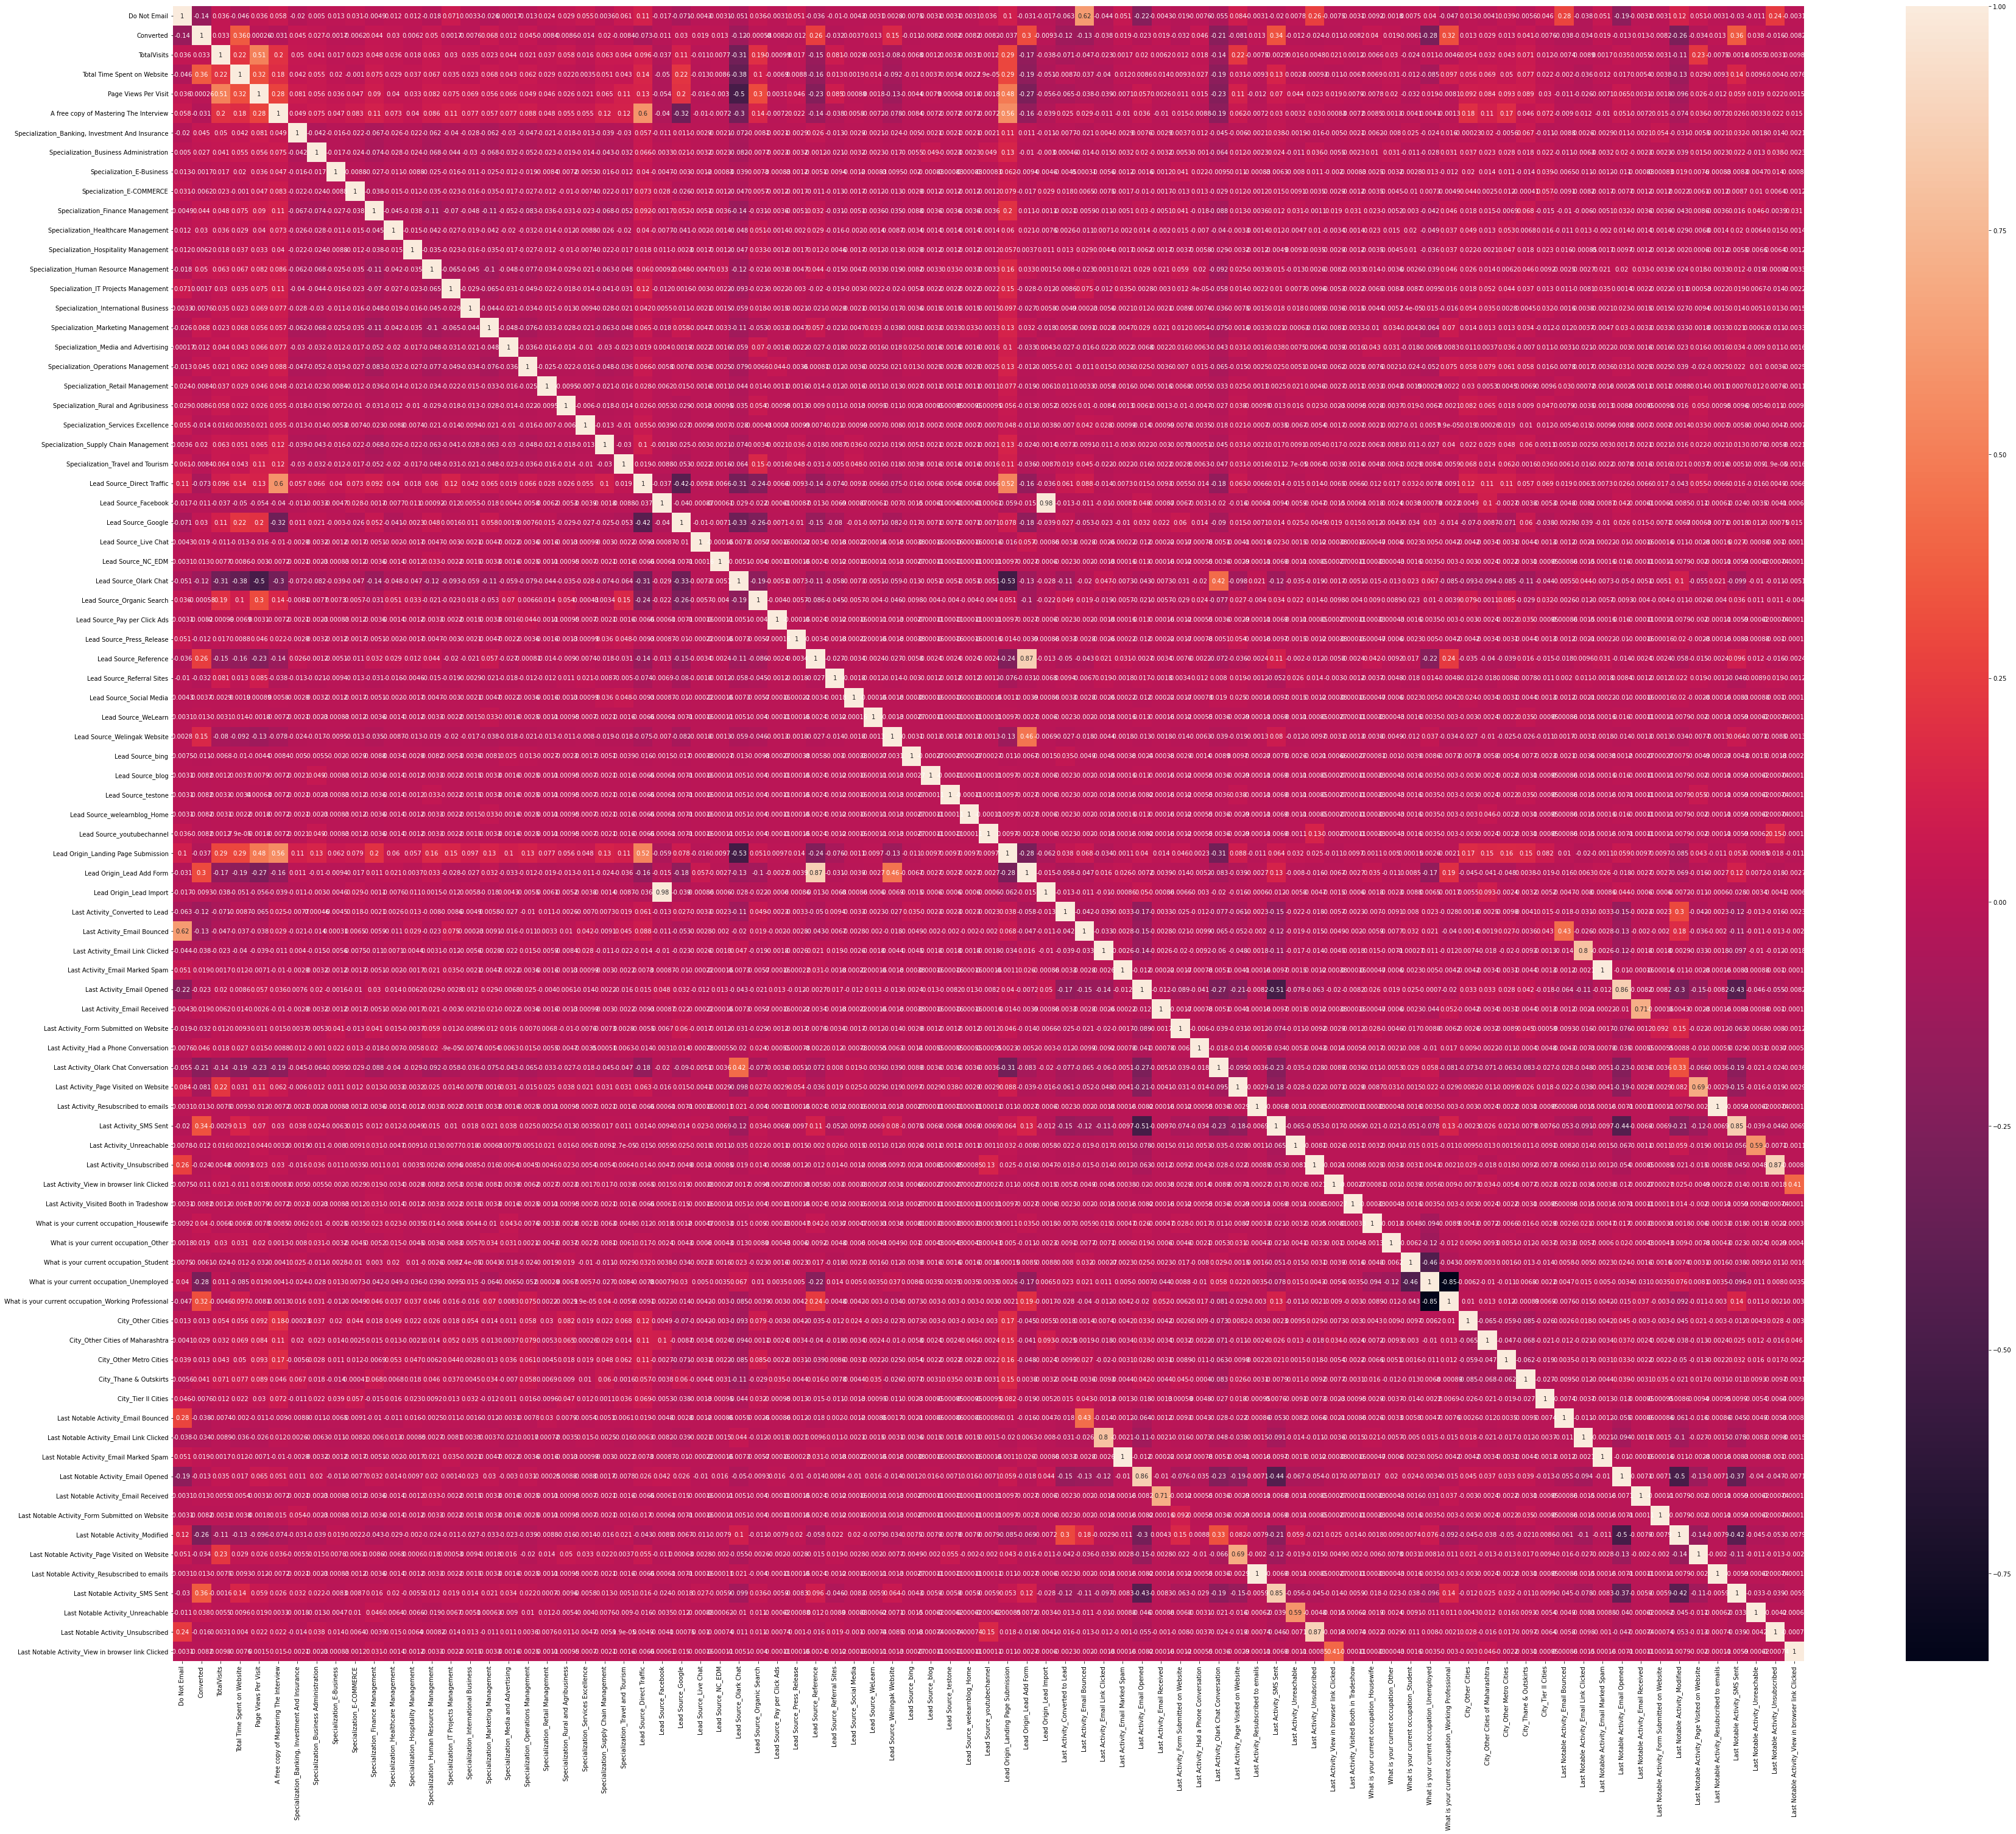

In [1548]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,50)) # Size of the figure
sns.heatmap(Lead_data.corr(),annot = True)
plt.show()

In [1549]:
#### Dropping highly correlated dummy variables

X_test.drop(['Lead Origin_Lead Import','Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent',
                       'Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened'], 1, inplace = True)


In [1551]:
X_train.drop(['Lead Origin_Lead Import','Last Notable Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails','Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Unsubscribed','Last Notable Activity_Email Opened'], 1, inplace = True)

#### Checking the Correlation Matrix

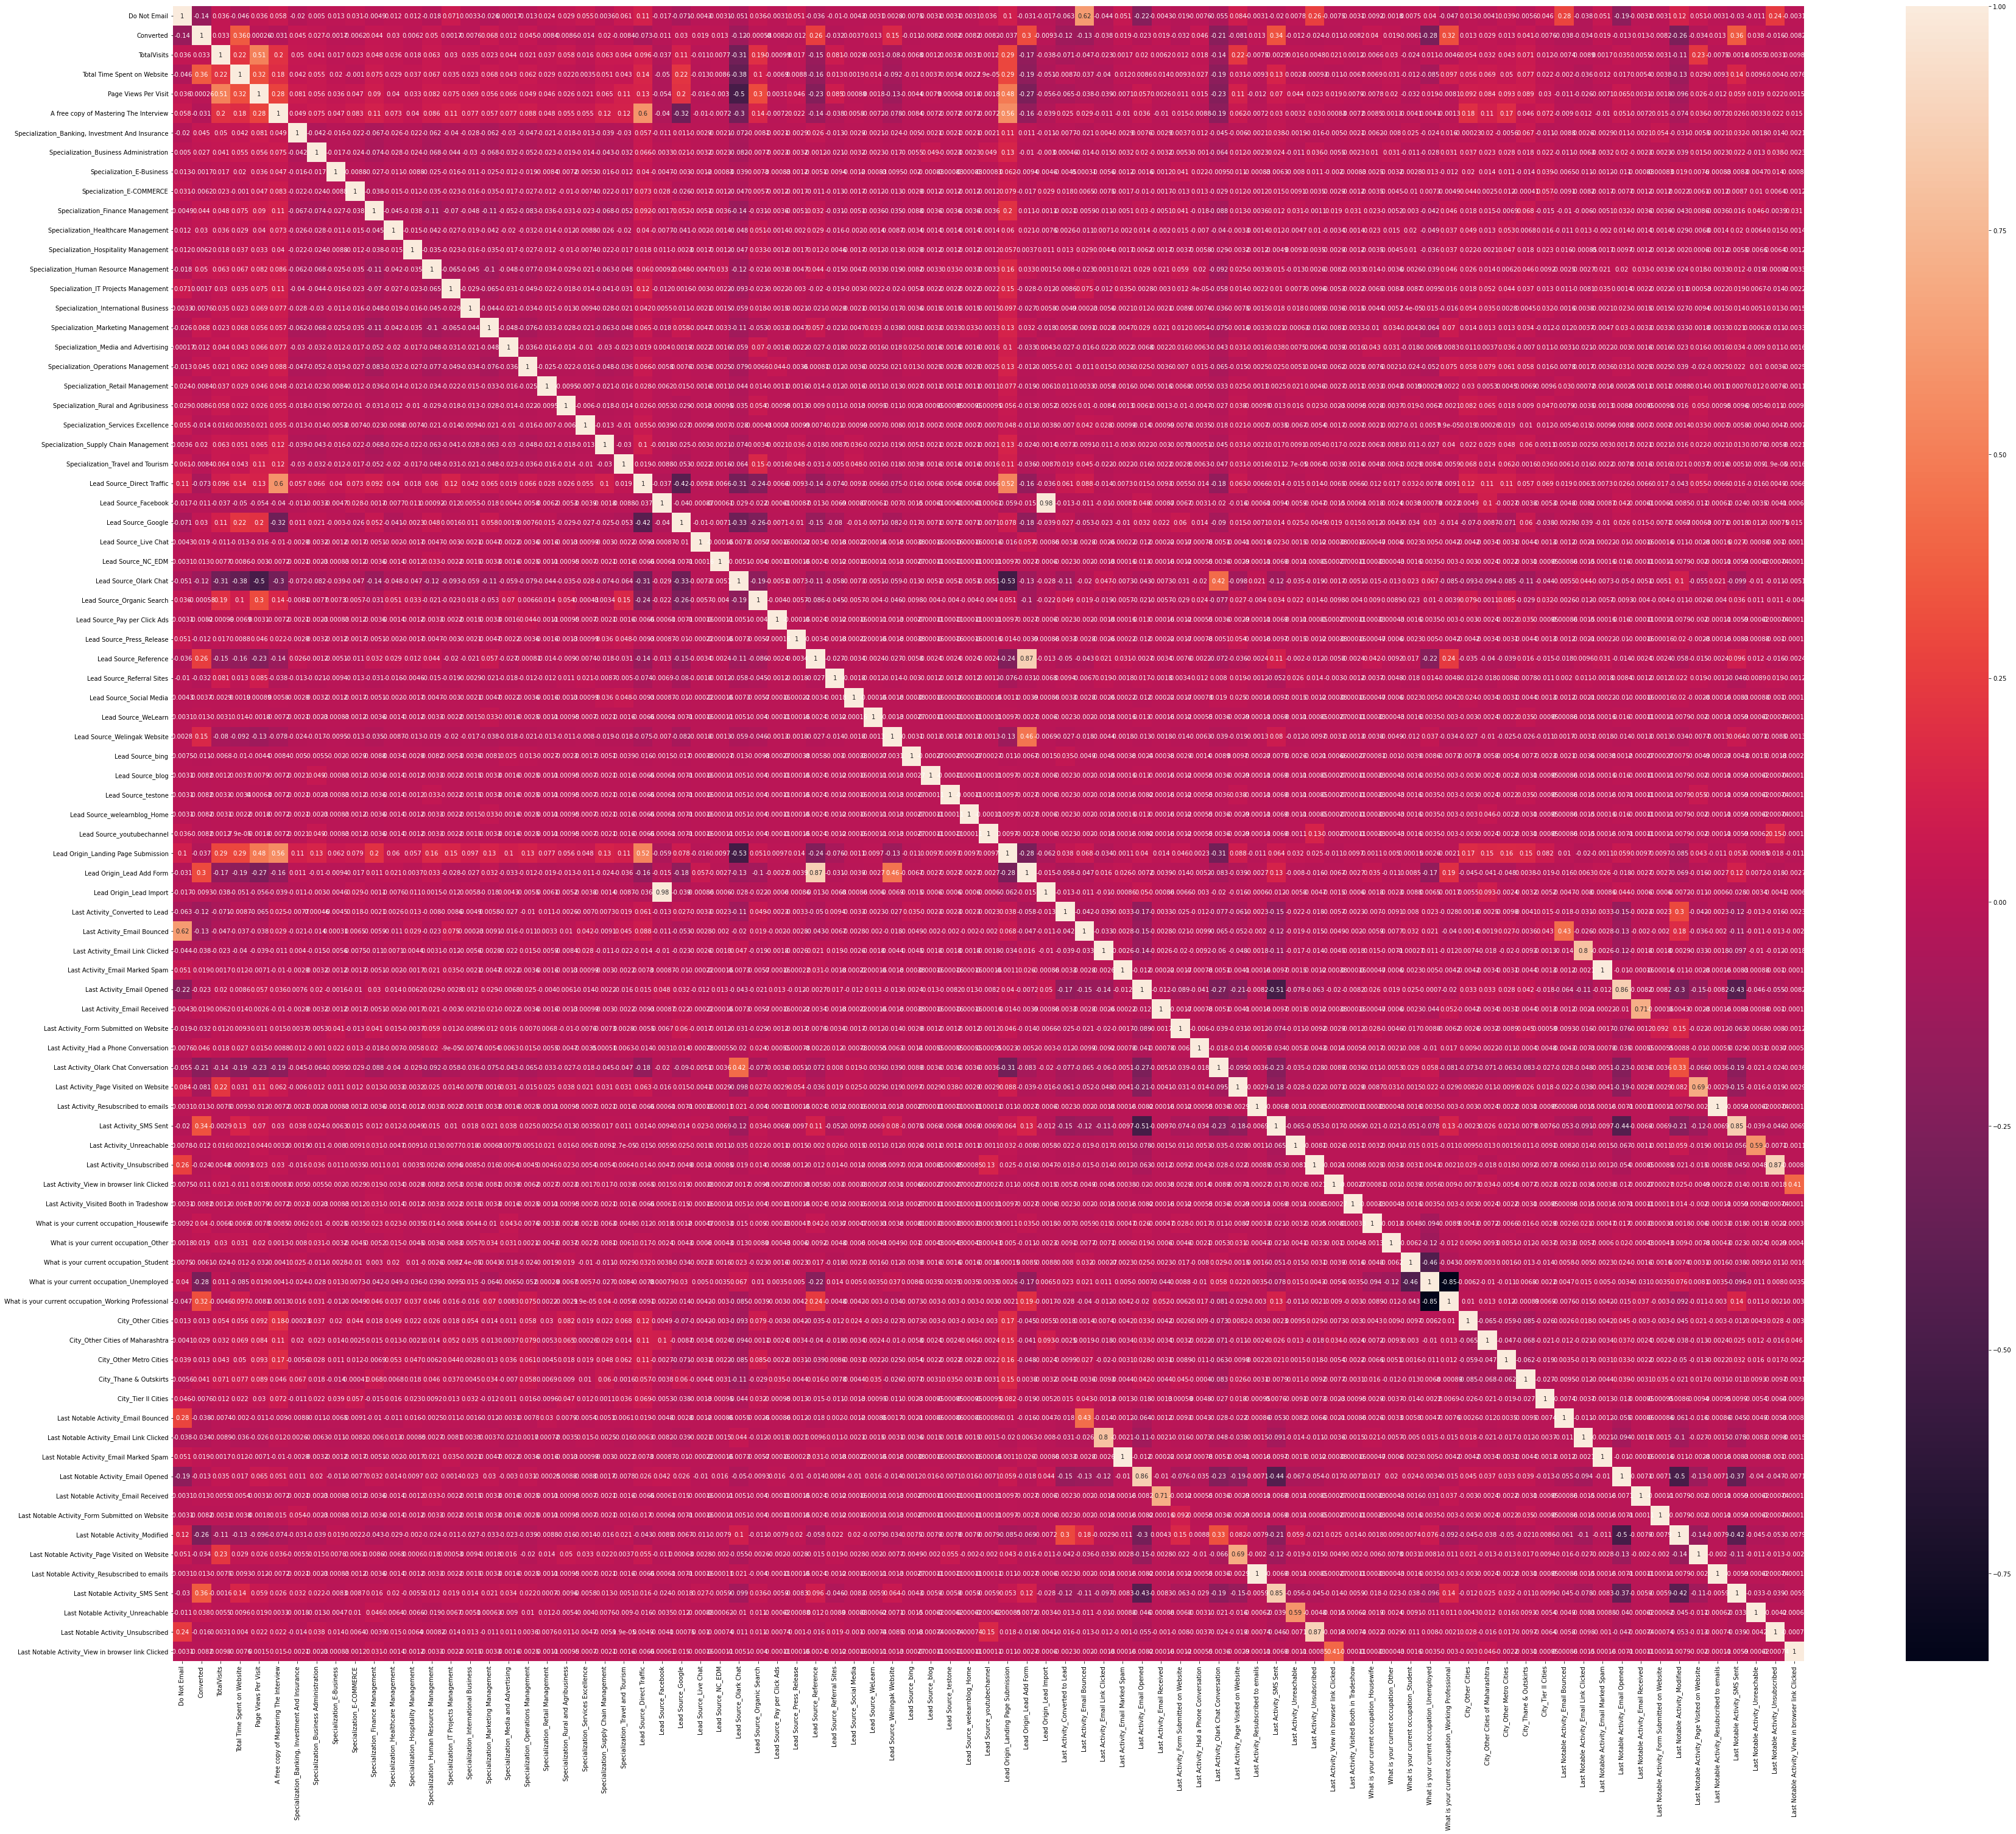

In [1553]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,50)) # Size of the figure
sns.heatmap(Lead_data.corr(),annot = True)
plt.show()

### Step 6 : Model Building
Let's start by splitting our data into a training set and a test set.

In [1554]:
import statsmodels.api as sm

In [1555]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2549.6
Date:                Mon, 20 Mar 2023   Deviance:                       5099.3
Time:                        20:39:14   Pearson chi2:                 6.57e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4115
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   24.8022   3.18e+04      0.001      0.999   -6.23e+04    6.23e+04
Do Not Email                                            -0.4392      0.061     -7.259      0.000      -0.558      -0.321
TotalVisits                                              0.0350      0.010      3.473      0.001       0.015       0.055
Total Time Spent on Website                              1.1126      0.041     26.869      0.000       1.031       1.194
Page Views Per Visit                                    -0.0735      0.025     -2.919      0.004      -0.123      -0.024
A free copy of Mastering The Interview                  -0.0896      0.051     -1.742      0.082      -0.190       0.011
Specialization_Banking, Investment And Insurance         1.3644      0.216      6.329      0.000       0.942       1.787
Specialization_Business Administration                   1.0578      0.213      4.962      0.000       0.640       1.476
Specialization_E-Business                                1.5634      0.456      3.429      0.001       0.670       2.457
Specialization_E-COMMERCE                                1.4225      0.344      4.139      0.000       0.749       2.096
Specialization_Finance Management                        1.1958      0.168      7.105      0.000       0.866       1.526
Specialization_Healthcare Management                     1.1149      0.291      3.827      0.000       0.544       1.686
Specialization_Hospitality Management                    0.7209      0.349      2.067      0.039       0.037       1.405
Specialization_Human Resource Management                 1.1386      0.169      6.728      0.000       0.807       1.470
Specialization_IT Projects Management                    1.2841      0.223      5.746      0.000       0.846       1.722
Specialization_International Business                    0.9505      0.268      3.553      0.000       0.426       1.475
Specialization_Marketing Management                      1.3193      0.167      7.900      0.000       0.992       1.647
Specialization_Media and Advertising                     0.8594      0.260      3.310      0.001       0.351       1.368
Specialization_Operations Management                     1.1318      0.201      5.633      0.000       0.738       1.526
Specialization_Retail Management                         0.9635      0.346      2.782      0.005       0.285       1.642
Specialization_Rural and Agribusiness                    0.9895      0.395      2.507      0.012       0.216       1.763
Specialization_Services Excellence                       0.7206      0.666      1.083      0.279      -0.584       2.025
Specialization_Supply Chain Management                   1

### Step 7 : Feature Selection Using RFE

In [1556]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1557]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = logreg, n_features_to_select = 15)  # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [1558]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False])

In [1559]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 30),
 ('TotalVisits', False, 63),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 61),
 ('A free copy of Mastering The Interview', False, 60),
 ('Specialization_Banking, Investment And Insurance', False, 7),
 ('Specialization_Business Administration', False, 18),
 ('Specialization_E-Business', False, 9),
 ('Specialization_E-COMMERCE', False, 11),
 ('Specialization_Finance Management', False, 13),
 ('Specialization_Healthcare Management', False, 17),
 ('Specialization_Hospitality Management', False, 24),
 ('Specialization_Human Resource Management', False, 14),
 ('Specialization_IT Projects Management', False, 12),
 ('Specialization_International Business', False, 20),
 ('Specialization_Marketing Management', False, 8),
 ('Specialization_Media and Advertising', False, 23),
 ('Specialization_Operations Management', False, 15),
 ('Specialization_Retail Management', False, 22),
 ('Specialization_Rural and Agribusiness', False, 19),
 ('Sp

In [1560]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [1561]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'Lead Source_Facebook',
       'Lead Source_Live Chat', 'Lead Source

### Step 8: Assessing the model with StatsModels

In [1562]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2670.8
Date:                Mon, 20 Mar 2023   Deviance:                       5341.6
Time:                        20:40:20   Pearson chi2:                 6.51e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3886
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0302      0.091      0.330      0.742      -0.149       0.210
Total Time Spent on Website                              1.1293      0.040     28.238      0.000       1.051       1.208
Lead Source_Direct Traffic                              -1.4892      0.115    -12.918      0.000      -1.715      -1.263
Lead Source_Google                                      -1.0592      0.109     -9.692      0.000      -1.273      -0.845
Lead Source_Organic Search                              -1.3159      0.133     -9.859      0.000      -1.578      -1.054
Lead Source_Referral Sites                              -1.4511      0.349     -4.159      0.000      -2.135      -0.767
Lead Source_Welingak Website                             1.9098      0.752      2.539      0.011       0.435       3.384
Lead Origin_Lead Add Form                                2.6458      0.228     11.622      0.000       2.200       3.092
Last Activity_Email Bounced                             -1.7662      0.378     -4.671      0.000      -2.507      -1.025
Last Activity_Had a Phone Conversation                   2.7415      0.705      3.891      0.000       1.361       4.122
Last Activity_Olark Chat Conversation                   -1.0134      0.166     -6.090      0.000      -1.340      -0.687
Last Activity_SMS Sent                                   1.1968      0.074     16.236      0.000       1.052       1.341
What is your current occupation_Housewife               22.8850   1.56e+04      0.001      0.999   -3.06e+04    3.06e+04
What is your current occupation_Working Professional     2.7748      0.189     14.715      0.000       2.405       3.144
Last Notable Activity_Modified                          -0.8883      0.080    -11.122      0.000      -1.045      -0.732
Last Notable Activity_Unreachable                        1.5749      0.471      3.346      0.001       0.652       2.497
========================================================================================================================
"""

In [1563]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.162466
1012    0.257254
9226    0.339646
4750    0.831117
7987    0.755455
1281    0.769077
2880    0.116682
4971    0.910343
7536    0.836960
1248    0.720645
dtype: float64

In [1564]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.16246587, 0.25725432, 0.3396463 , 0.83111725, 0.75545524,
       0.76907747, 0.1166818 , 0.91034266, 0.83696   , 0.72064461])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [1565]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID
0          0        0.162466         3009
1          0        0.257254         1012
2          0        0.339646         9226
3          1        0.831117         4750
4          1        0.755455         7987

#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [1566]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted
0          0        0.162466         3009          0
1          0        0.257254         1012          0
2          0        0.339646         9226          0
3          1        0.831117         4750          1
4          1        0.755455         7987          1

In [1567]:
from sklearn import metrics

In [1568]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3459  446]
 [ 748 1698]]


In [1569]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8119981105337742


### Step 9 : Checking VIFs

In [1570]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1571]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
13                     Last Notable Activity_Modified  1.82
6                           Lead Origin_Lead Add Form  1.59
10                             Last Activity_SMS Sent  1.50
2                                  Lead Source_Google  1.43
1                          Lead Source_Direct Traffic  1.37
5                        Lead Source_Welingak Website  1.33
9               Last Activity_Olark Chat Conversation  1.31
0                         Total Time Spent on Website  1.20
3                          Lead Source_Organic Search  1.19
12  What is your current occupation_Working Profes...  1.18
7                         Last Activity_Email Bounced  1.11
4                          Lead Source_Referral Sites  1.02
8              Last Activity_Had a Phone Conversation  1.01
11          What is your current occupation_Housewife  1.01
14                  Last Notable Activity_Unreachable  1.01

#### Metrics beyond simply accuracy 

In [1572]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1573]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6941946034341783

In [1574]:
# Let us calculate specificity
TN / float(TN+FP)

0.885787451984635

In [1575]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11421254801536491


In [1576]:
# positive predictive value 
print (TP / float(TP+FP))

0.7919776119402985


In [1577]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8222010934157357


### Step 10: Plotting the ROC Curve

In [1578]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1579]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

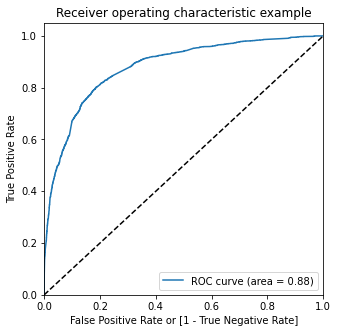

In [1580]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 11 : Finding Optimal Cutoff Point

In [1581]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.162466         3009          0    1    1    0    0    0   
1          0        0.257254         1012          0    1    1    1    0    0   
2          0        0.339646         9226          0    1    1    1    1    0   
3          1        0.831117         4750          1    1    1    1    1    1   
4          1        0.755455         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    0    0    0    0    0  
3    1    1    1    1    0  
4    1    1    1    0    0

In [1582]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.590773  0.967702  0.354673
0.2   0.2  0.735947  0.918234  0.621767
0.3   0.3  0.796410  0.834424  0.772599
0.4   0.4  0.813573  0.759199  0.847631
0.5   0.5  0.811998  0.694195  0.885787
0.6   0.6  0.792946  0.587899  0.921383
0.7   0.7  0.777200  0.504088  0.948271
0.8   0.8  0.758306  0.417825  0.971575
0.9   0.9  0.711069  0.267375  0.988988


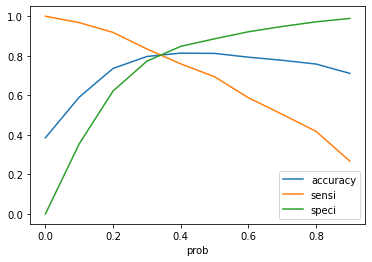

In [1583]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [1584]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.162466         3009          0    1    1    0    0    0   
1          0        0.257254         1012          0    1    1    1    0    0   
2          0        0.339646         9226          0    1    1    1    1    0   
3          1        0.831117         4750          1    1    1    1    1    1   
4          1        0.755455         7987          1    1    1    1    1    1   

   0.5  0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    0    0    0    0    0                1  
3    1    1    1    1    0                1  
4    1    1    1    0    0                1

In [1585]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7964100141709967

In [1586]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3017,  888],
       [ 405, 2041]], dtype=int64)

In [1587]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1588]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8344235486508585

In [1589]:
# Let us calculate specificity
TN / float(TN+FP)

0.7725992317541613

In [1590]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22740076824583866


In [1591]:
# Positive predictive value 
print (TP / float(TP+FP))

0.696824854899283


In [1592]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8816481589713617


### Precision and Recall

In [1593]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3459,  446],
       [ 748, 1698]], dtype=int64)

##### Precision

TP / TP + FP

In [1594]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7919776119402985

###### Recall
TP / TP + FN

In [1595]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6941946034341783

Using sklearn utilities for the same

In [1596]:
from sklearn.metrics import precision_score, recall_score

In [1597]:
# precision_score

In [1598]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7919776119402985

In [1599]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6941946034341783

### Step 12: Precision and recall tradeoff

In [1600]:
from sklearn.metrics import precision_recall_curve

In [1601]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [1602]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

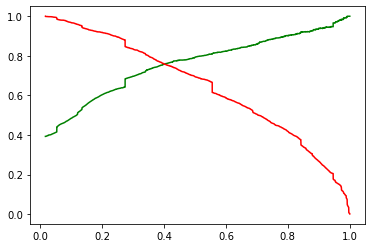

In [1603]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Step 11: Making predictions on the test set 

In [1604]:
scaler = StandardScaler()
X_test.head()
#X_test[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']]
#X_test[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']] = scaler.fit_transform(X_test[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']])

Do Not Email  TotalVisits  Total Time Spent on Website  \
3271             0          4.0                          157   
1490             0          5.0                         1513   
7936             0          2.0                           74   
4216             0          0.0                            0   
3830             0          8.0                          164   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3271                   4.0                                       0   
1490                   5.0                                       1   
7936                   2.0                                       0   
4216                   0.0                                       0   
3830                   8.0                                       1   

      Specialization_Banking, Investment And Insurance  \
3271                                                 0   
1490                                                 0   
7936                                                 0   
4216                                                 0   
3830                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
3271                                       0                          0   
1490                                       0                          0   
7936                                       0                          0   
4216                                       0                          0   
3830                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
3271                          0                                  0   
1490                          0                                  0   
7936                          0                                  0   
4216                          1                                  0   
3830                          0                                  0   

      Specialization_Healthcare Management  \
3271                                     0   
1490                                     0   
7936                                     0   
4216                                     0   
3830                                     0   

      Specialization_Hospitality Management  \
3271                                      0   
1490                                      0   
7936                                      0   
4216                                      0   
3830                                      0   

      Specialization_Human Resource Management  \
3271                                         0   
1490                                         0   
7936                                         0   
4216                                         0   
3830                                         0   

      Specialization_IT Projects Management  \
3271                                      0   
1490                                      0   
7936                                      0   
4216                                      0   
3830                                      0   

      Specialization_International Business  \
3271                                      0   
1490                                      0   
7936                                      0   
4216                                      0   
3830                                      0   

      Specialization_Marketing Management  \
3271                                    0   
1490                                    0   
7936                                    0   
4216                                    0   
3830                                    0   

      Specialization_Media and Advertising  \
3271                                     0   
1490                                     1   
7936                                     0   
4216                                     0   
3830                                     0   

    

In [1605]:
X_test[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']]

Do Not Email  Total Time Spent on Website  \
3271             0                          157   
1490             0                         1513   
7936             0                           74   
4216             0                            0   
3830             0                          164   
...            ...                          ...   
850              0                          829   
2879             0                          589   
6501             0                         1335   
7155             0                          515   
376              0                          372   

      A free copy of Mastering The Interview  
3271                                       0  
1490                                       1  
7936                                       0  
4216                                       0  
3830                                       1  
...                                      ...  
850                                        1  
2879                                       0  
6501                                       1  
7155                                       1  
376                                        0  

[2723 rows x 3 columns]

In [1606]:
X_test[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']] = scaler.fit_transform(X_test[['Do Not Email','Total Time Spent on Website','A free copy of Mastering The Interview']])

In [1607]:
X_test = X_test[col]
X_test.head()

Total Time Spent on Website  Lead Source_Direct Traffic  \
3271                    -0.591008                           0   
1490                     1.894051                           1   
7936                    -0.743117                           0   
4216                    -0.878732                           0   
3830                    -0.578179                           0   

      Lead Source_Google  Lead Source_Organic Search  \
3271                   1                           0   
1490                   0                           0   
7936                   1                           0   
4216                   0                           0   
3830                   0                           1   

      Lead Source_Referral Sites  Lead Source_Welingak Website  \
3271                           0                             0   
1490                           0                             0   
7936                           0                             0   
4216                           0                             0   
3830                           0                             0   

      Lead Origin_Lead Add Form  Last Activity_Email Bounced  \
3271                          0                            0   
1490                          0                            0   
7936                          0                            0   
4216                          1                            0   
3830                          0                            0   

      Last Activity_Had a Phone Conversation  \
3271                                       0   
1490                                       0   
7936                                       0   
4216                                       0   
3830                                       0   

      Last Activity_Olark Chat Conversation  Last Activity_SMS Sent  \
3271                                      0                       0   
1490                                      0                       0   
7936                                      0                       0   
4216                                      0                       0   
3830                                      0                       0   

      What is your current occupation_Housewife  \
3271                                          0   
1490                                          0   
7936                                          0   
4216                                          0   
3830                                          0   

      What is your current occupation_Working Professional  \
3271                                                  0      
1490                                                  1      
7936                                                  0      
4216                                                  0      
3830                                                  0      

      Last Notable Activity_Modified  Last Notable Activity_Unreachable  
3271                               0                                  0  
1490                               0                                  0  
7936                               0                                  0  
4216                               1                                  0  
3830                               0                                  0

In [1608]:
X_test_sm = sm.add_constant(X_test)

In [1609]:
y_test_pred = res.predict(X_test_sm)

In [1610]:
X_test_sm.shape

(2723, 16)

In [1611]:
X_test.shape

(2723, 15)

In [1612]:
X_train_sm.shape

(6351, 16)

In [1613]:
X_train

Do Not Email  TotalVisits  Total Time Spent on Website  \
3009     -0.292645          2.0                    -0.160255   
1012      3.417111          2.0                    -0.540048   
9226     -0.292645          0.0                    -0.888650   
4750     -0.292645          2.0                     1.643304   
7987     -0.292645          5.0                     2.017593   
...            ...          ...                          ...   
367      -0.292645          5.0                     0.595662   
82       -0.292645          0.0                    -0.888650   
8199     -0.292645          0.0                    -0.888650   
7077     -0.292645          5.0                    -0.046500   
5754     -0.292645          6.0                     1.129574   

      Page Views Per Visit  A free copy of Mastering The Interview  \
3009                   2.0                                1.473344   
1012                   2.0                               -0.678728   
9226                   0.0                               -0.678728   
4750                   2.0                               -0.678728   
7987                   2.5                               -0.678728   
...                    ...                                     ...   
367                    5.0                               -0.678728   
82                     0.0                               -0.678728   
8199                   0.0                               -0.678728   
7077                   5.0                               -0.678728   
5754                   6.0                                1.473344   

      Specialization_Banking, Investment And Insurance  \
3009                                                 0   
1012                                                 0   
9226                                                 0   
4750                                                 0   
7987                                                 0   
...                                                ...   
367                                                  0   
82                                                   0   
8199                                                 0   
7077                                                 0   
5754                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
3009                                       0                          0   
1012                                       0                          0   
9226                                       0                          0   
4750                                       0                          0   
7987                                       0                          0   
...                                      ...                        ...   
367                                        0                          0   
82                                         0                          0   
8199                                       0                          0   
7077                                       0                          0   
5754                                       0                          0   

      Specialization_E-COMMERCE  Specialization_Finance Management  \
3009                          0                                  1   
1012                          0                                  0   
9226                          0                                  0   
4750                          0                                  0   
7987                          0                                  1   
...                         ...                                ...   
367                           0                                  0   
82                            0                                  0   
8199                          0                                  0   
7077                          0                                  0   
5754                        

In [1614]:
y_test_pred[:10]

3271    0.154936
1490    0.969372
7936    0.133753
4216    0.688962
3830    0.125795
1800    0.713162
6507    0.364120
4821    0.261168
4223    0.946870
4714    0.342163
dtype: float64

In [1615]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1616]:
# Let's see the head
y_pred_1.head()

0
3271  0.154936
1490  0.969372
7936  0.133753
4216  0.688962
3830  0.125795

In [1617]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1618]:
# Putting ProspectID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1619]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1620]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1621]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         3271  0.154936
1          1         1490  0.969372
2          0         7936  0.133753
3          1         4216  0.688962
4          0         3830  0.125795

In [1622]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1623]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [1624]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_Prob
0         3271          0        0.154936
1         1490          1        0.969372
2         7936          0        0.133753
3         4216          1        0.688962
4         3830          0        0.125795

In [1625]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [1626]:
y_pred_final.head()

Prospect ID  Converted  Converted_Prob  final_predicted
0         3271          0        0.154936                0
1         1490          1        0.969372                1
2         7936          0        0.133753                0
3         4216          1        0.688962                1
4         3830          0        0.125795                0

In [1627]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7965479250826295

In [1628]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1355,  379],
       [ 175,  814]], dtype=int64)

In [1629]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1630]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8230535894843276

In [1631]:
# Let us calculate specificity
TN / float(TN+FP)

0.7814302191464821

In [1632]:
Converted = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
Converted

37.85541106458012

In [1633]:
Converted_pred = (sum(y_pred_final['final_predicted'])/len(y_pred_final['final_predicted'].index))*100
Converted_pred

43.811972089607046

In [1634]:
y_pred_final.drop('Converted',1 , inplace = True)
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100, 2))
y_pred_final.set_index('Prospect ID')

Converted_Prob  final_predicted  Lead_Score
Prospect ID                                             
3271               0.154936                0       15.49
1490               0.969372                1       96.94
7936               0.133753                0       13.38
4216               0.688962                1       68.90
3830               0.125795                0       12.58
...                     ...              ...         ...
850                0.232551                0       23.26
2879               0.155689                0       15.57
6501               0.818816                1       81.88
7155               0.093312                0        9.33
376                0.105292                0       10.53

[2723 rows x 3 columns]